# SOLVING THE TRAFFIC PROBLEM SYMBOLICALLY

In [149]:
import sympy
import numpy
from matplotlib import pyplot
import ipywidgets
%matplotlib inline


In [150]:
sympy.init_printing()

u_max, u_star, rho_max, rho_star, A, B = sympy.symbols('u_max u_star rho_max rho_star A B')

In [151]:
u_max + u_star

In [152]:
#Use equation command from sympy library with = sympy.Eq(left side, right side)

#No traffic flux at max density
eq1 = sympy.Eq(0, u_max * rho_max * (1 - A*rho_max - B*rho_max**2))

#max traffic flux when rho = rho_star
eq2 = sympy.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))

#velocity u_star when rho = rho_star
eq3 = sympy.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

In [153]:
eq1

In [154]:
eq2

In [155]:
eq3

# 3 conditional equations above

In [156]:

#Algebracially manipulating eq2 and eq3 to get rid of B

eq4 = sympy.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)
eq4

In [157]:

#Simplifying the equation to get rid of B

eq4.simplify()

In [158]:
eq4.expand()

In [159]:
rho_star_sol = sympy.solve(eq4, rho_star)[0]
rho_star_sol

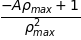

In [160]:
B_sol = sympy.solve(eq1, B)[0]
B_sol

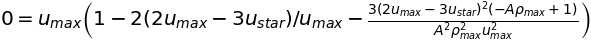

In [161]:

#Subbing in rho, sol into equation 2

eq5 = eq2.subs([(rho_star, rho_sol), (B, B_sol)])
eq5

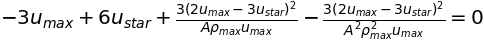

In [162]:
eq5.simplify()

In [163]:

#Quadratic roots of A

A_sol = sympy.solve(eq5, A)

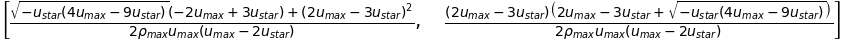

In [164]:
A_sol

# Solving the New Flux Equation

In [165]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

In [166]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

In [167]:
A_val = max(A_val_0, A_val_1)
A_val

In [168]:
B_val = B_sol.evalf(subs={A: A_val, rho_max: 10.0})
B_val

In [177]:

#function to return the cubic form of the flux 

def cubic_flux(rho, u_max, A, B):
    F = rho * u_max * (1 - A * rho - B * rho**2)
    return F


#function to return the cubic form of the flux 

def quad_flux(rho, u_max, rho_max):
    F = rho * u_max * (1 - rho / rho_max)
    return F

In [208]:

#Setting some parameters

rho_max = 4.0
u_max = 1.0

L = 4.0
nx = 81
dx = L / (nx-1)
x = numpy.linspace(0, L, num=nx)
sigma = 1.0
dt = sigma * dx / u_max
nt = 30

In [209]:

#Setting the initial conditions

rho0 = numpy.zeros_like(x)
mask = x < 2.0
rho0[mask] = rho_max * x[mask] / 2

Text(0.5, 1.0, 'Initial Conditions')

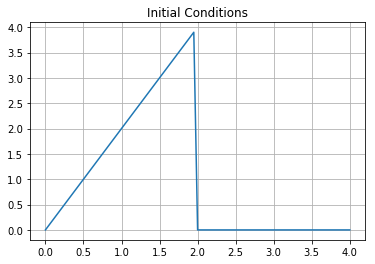

In [210]:
pyplot.plot(x, rho0)
pyplot.grid()
pyplot.title('Initial Conditions')

In [211]:

def lax_friedrichs(rho0, nt, dt, dx, cubic_flux, *args):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    for n in range(nt):
        F = cubic_flux(rho, *args)
        
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt /(2*dx) * (F[2:] - F[:-2]))
        rho_hist.append(rho.copy())
        
    return rho_hist

In [214]:
rho_hist = lax_friedrichs(rho0, nt, dt, dx, cubic_flux, u_max, A_val, B_val)


Text(0, 0.5, 'Car Density')

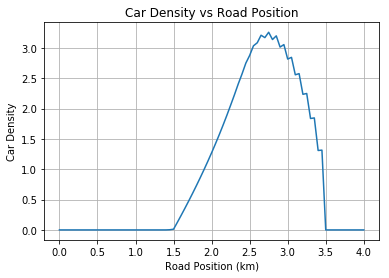

In [225]:
pyplot.figure()
pyplot.plot(x, rho_hist[30])
pyplot.grid()
pyplot.title('Car Density vs Road Position')
pyplot.xlabel('Road Position (km)')
pyplot.ylabel('Car Density')